# Titanic Dataset

## EDA & Cleaning: Exploring continuous features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This section focuses on exploring the `Pclass`, `Age`, `SibSp`, `Parch`, and `Fare` features.**

In [2]:
# Importing the required libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd/gdrive

Mounted at /gdrive
/gdrive


In [4]:
# Mounting google drive to access data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Read csv files
titanic_data= '/content/drive/MyDrive/Summer_Learning/Ex_Files_Applied_Machine_Learning/Exercise_Files/titanic.csv'
titanic = pd.read_csv(titanic_data)
print(titanic.columns)
print()
titanic.head(5)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Drop all categorical features that are not needed to analyse the data
cont_feat = ['PassengerId', 'Pclass','Name', 'Age', 'SibSp', 'Parch', 'Fare']
titanic.drop(cont_feat, axis=1, inplace=True)
titanic.head(5)

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


## Explore categorical features

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [8]:
# We found some null values om cabin and embarked
# Generating average value for survived feild for each of those 2 groups
titanic.groupby(titanic['Cabin'].isnull()).mean()

,Survived
Cabin,
False,0.666667
True,0.299854


In [9]:
# A large no of cabin values are missing so we should have droped the column
# Here cabin matters so we will fill the empty values by 1 or 0
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0,1)
titanic.head()

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_ind
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0


## Plot categorical features

<Figure size 432x288 with 0 Axes>

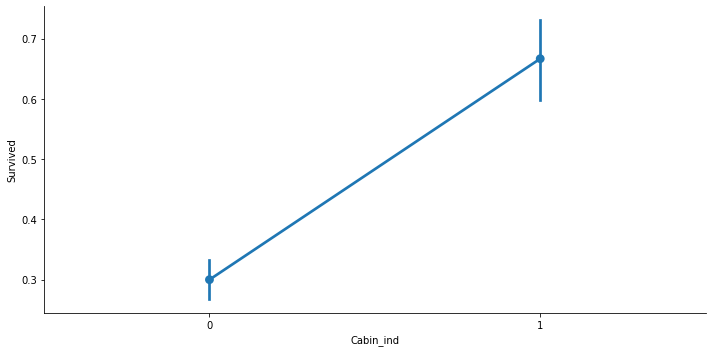

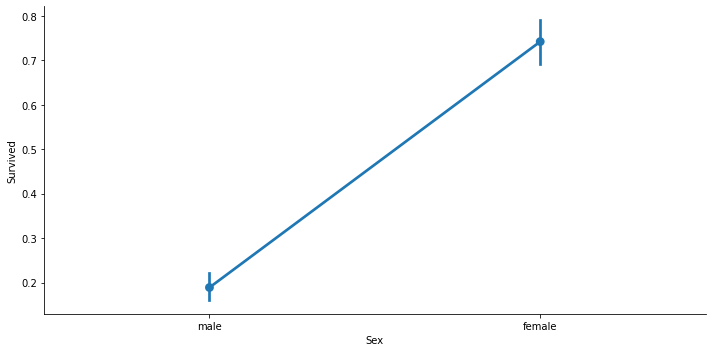

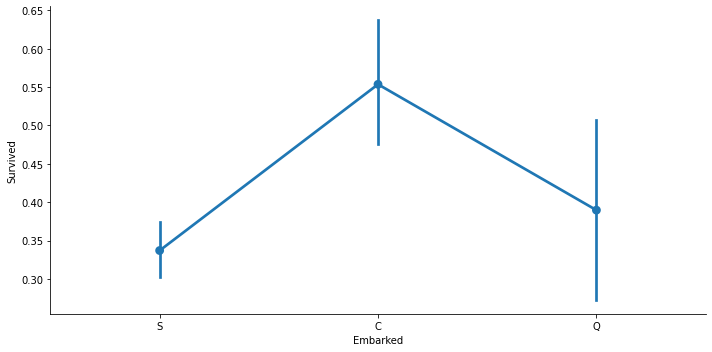

In [10]:
# Here we will understand the relationship between the three categorical features and survivory
# For instance women survival is more than men

for i, col in enumerate(['Cabin_ind','Sex','Embarked']):
  plt.figure(i)
  sns.catplot(x=col, y="Survived", data=titanic, kind='point', aspect=2,)

# People having out-cabin have 30% survival rate while having cabin have 60% survival rate
# 20% of male survived whereas 70% of female survived

In [11]:
# Want to see only survived column where index should be male or female
# aggregation func defaut is mean but we want to see count to see where people boared count on gender
titanic.pivot_table('Survived', index = "Sex", columns = "Embarked",aggfunc='count' )

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [12]:
# Relationship b/w port and wheather they have cabin or not
titanic.pivot_table('Survived', index = "Cabin_ind", columns = "Embarked",aggfunc='count' )

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129


In [22]:
# Removing null values from age
# gives true or false based on row has null value or not
titanic.groupby(titanic['Age'].isnull()).mean()


,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


## Fill missing value for age

In [26]:
titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,family_cnt
Age,,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.943978
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567,0.745763


In [27]:
# Fill missing for Age by average age (it will not bias model)
titanic['Age'].fillna(titanic["Age"].mean(), inplace = True)
titanic.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
family_cnt    0
dtype: int64

In [28]:
titanic.head(10)
# average value will be in float 

,Survived,Pclass,Age,SibSp,Parch,Fare,family_cnt
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,1
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,1
4,0,3,35.000000,0,0,8.0500,0
5,0,3,29.699118,0,0,8.4583,0
6,0,1,54.000000,0,0,51.8625,0
7,0,3,2.000000,3,1,21.0750,4
8,1,3,27.000000,0,2,11.1333,2
9,1,2,14.000000,1,0,30.0708,1


In [ ]:
# Drop SibSp and Parch
titanic.drop(['SibSp','Parch'], axis = 1, inplace= True)

In [36]:
titanic.head()

,Survived,Pclass,Age,Fare,family_cnt,Family_cnt
0,0,3,22.0,7.2500,1,1
1,1,1,38.0,71.2833,1,1
2,1,3,26.0,7.9250,0,0
3,1,1,35.0,53.1000,1,1
4,0,3,35.0,8.0500,0,0


## Plot Continuous Features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


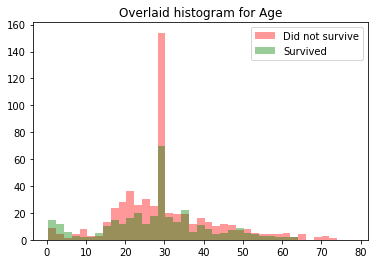

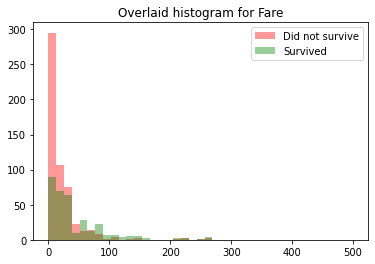

In [33]:
# Plot Continuous fetures
for i in ['Age', 'Fare']:
  died = list(titanic[titanic['Survived'] ==0 ][i].dropna())
  survived = list(titanic[titanic['Survived']==1][i].dropna())
  xmin = min(min(died), min(survived))
  xmax = max(max(died), max(survived))
  width = (xmax - xmin) / 40
  sns.distplot(died, color = 'r', kde = False, bins = np.arange(xmin, xmax, width))
  sns.distplot(survived, color = 'g', kde = False, bins = np.arange(xmin, xmax, width))
  plt.legend(['Did not survive', 'Survived'])
  plt.title('Overlaid histogram for {}'. format(i))
  plt.show()